In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

import matplotlib.animation as animation


from fcnn4_minibatches import NN

In [2]:
ds = pd.read_csv('./bank-churn.csv')

In [3]:
num1 = ds[ds['Exited']==1].__len__()
num0 = num1

In [4]:
ds = pd.concat([ds[ds['Exited']==1][:num1], ds[ds['Exited']==0][:num0]], axis=0)

In [5]:
ds = ds.sample(frac=1)

In [6]:
x = ds[['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = ds['Exited']

In [7]:
m = len(x)
tr_cv = round(0.8 * m)  # border between train and dev datasets
cv_test = round(0.9 * m) # border between dev and test datasets

X_train, X_cv, X_test = x[:tr_cv], x[tr_cv:cv_test], x[cv_test:]
y_train, y_cv, y_test = y[:tr_cv], y[tr_cv:cv_test], y[cv_test:]

In [8]:
def z_standartization(df, columns):
  mean_dict = {}
  sd_dict = {}
  new_df = df.copy()
  for col in columns:
    c = new_df[col]
    mean = c.mean()
    sd = c.std()
    new_df[col] = (c - mean) / sd

    mean_dict[col] = mean
    sd_dict[col] = sd
  return new_df, mean_dict, sd_dict

In [9]:
def z_standartization_means_sd_from_dict(df, mean_dict, sd_dict):
  new_df = df.copy()
  for col, mean in mean_dict.items():
    sd = sd_dict[col]

    new_df[col] = (new_df[col] - mean) / sd
  
  return new_df


In [10]:
columns_to_scale = ['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [11]:
scaled_X_train, mean_X_train, sd_X_train = z_standartization(X_train, columns_to_scale)

scaled_X_cv = z_standartization_means_sd_from_dict(X_cv, mean_X_train, sd_X_train)
scaled_X_test = z_standartization_means_sd_from_dict(X_test, mean_X_train, sd_X_train)

In [12]:
scaled_X_train = np.array(scaled_X_train, dtype=np.float64).T
scaled_X_cv = np.array(scaled_X_cv, dtype=np.float64).T
scaled_X_test = np.array(scaled_X_test, dtype=np.float64).T

y_train, y_cv, y_test = np.array(y_train).reshape(1, -1), np.array(y_cv).reshape(1, -1), np.array(y_test).reshape(1, -1)

(array([29600.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 29531.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

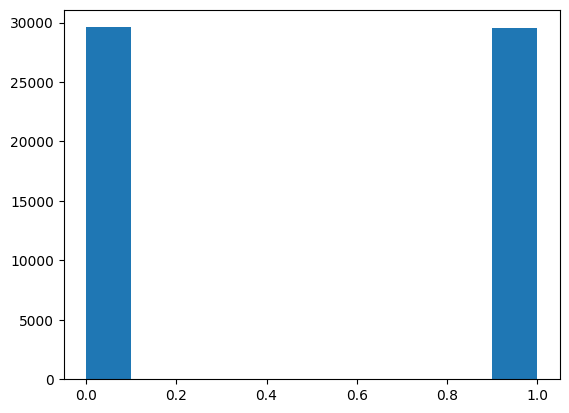

In [13]:
plt.hist(y_train.T)

In [14]:
model_1 = NN([7, 10, 10, 1])
J_history = []
J_cv_history = []

In [15]:
# model_1.load_json('./model_params.json')

In [26]:
epochs = 3

In [28]:
J_h, J_cv_h = model_1.backward(scaled_X_train, y_train, l_rate=0.005, epochs=epochs, minibatch_size=256, keep_prob=1, X_cv=scaled_X_cv, Y_cv=y_cv)
J_history += J_h
J_cv_history += J_cv_h

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
*Epoch 1*
-------------------------------------------
Batch 1
J: [[0.53952575]] => [[0.53952575]]
MAE: [[0.37050995]] => [[0.37050995]]
Accuracy: 43296/59131 (73.22%) => 43296/59131 (73.22%)
J_cv: [[0.53974909]] => [[0.53974909]]
MAE_cv: [[0.37099198]] => [[0.37099198]]
Accuracy_cv: 5432/7392 (73.48%) => 5432/7392 (73.48%)
-------------------------------------------
Batch 2
J: [[0.53953085]] => [[0.53953085]]
MAE: [[0.37055921]] => [[0.37055921]]
Accuracy: 43296/59131 (73.22%) => 43296/59131 (73.22%)
J_cv: [[0.53928397]] => [[0.53928397]]
MAE_cv: [[0.37085984]] => [[0.37085984]]
Accuracy_cv: 5432/7392 (73.48%) => 5432/7392 (73.48%)
-------------------------------------------
Batch 3
J: [[0.53952084]] => [[0.53952084]]
MAE: [[0.37056802]] => [[0.37056802]]
Accuracy: 43301/59131 (73.23%) => 43301/59131 (73.23%)
J_cv: [[0.53934518]] => [[0.53934518]]
MAE_cv: [[0.37090561]] => [[0.37090561]]
Accuracy_cv: 5431/7392 (73.47%) => 5431/7392 (73.47%)

In [21]:
len(J_history), len(J_cv_history)

(926, 926)

Text(0, 0.5, 'J value')

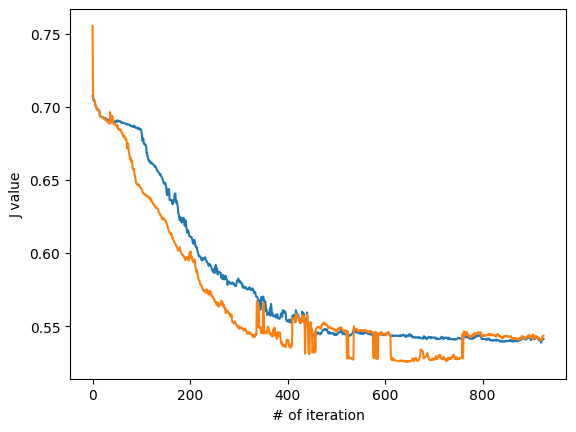

In [22]:
J_hist = [arr[0][0] for arr in J_history]
J_cv_hist = [arr[0][0] for arr in J_cv_history]
plt.plot(J_hist)
plt.plot(J_cv_hist)
plt.xlabel('# of iteration')
plt.ylabel('J value')

In [ ]:
# model_1.save_json()